In [21]:
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.utils import getColor
from Gaugi.monet import ATLASLabel
from ROOT import TH1,TH1F, TH2F, TProfile,TCanvas, TFile, TPad, TColor
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow
import numpy as np
import math, ROOT
%config InlineBackend.figure_format = 'retina'
#%jsroot on
#%config InlineBackend.figure_format = 'svg'

In [2]:
from Gaugi.monet.AtlasStyle import SetAtlasStyle
SetAtlasStyle()


Applying ATLAS style settings...


In [3]:
basepath = "/Volumes/castor/phd_data/ringer_analysis/zee_run2/2020/time_analysis"
case_1 = TFile(basepath+'/expert-monitoring-case1.root','r')
case_2 = TFile(basepath+'/expert-monitoring-case2.root','r')
case_3 = TFile(basepath+'/expert-monitoring-case3.root','r')

In [4]:
name = "FastCaloL2EgammaHypo/ElectronEgammaFastCaloHypo/TIME_NN_exec"

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file FastCaloElectronHypo_NN_Time.pdf has been created


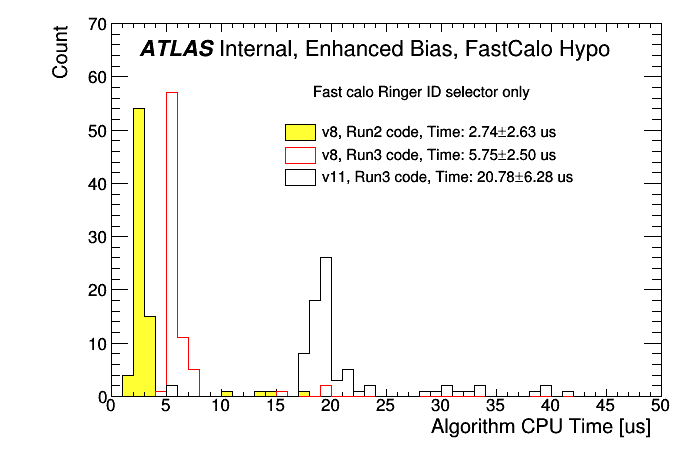

In [44]:
outcan = TCanvas( 'canvas', "", 700, 500 ) 
drawopt = 'hist'

h1 = case_1.Get(name)
h2 = case_2.Get(name)
h3 = case_3.Get(name)
y_value = 70
h1.SetMaximum(y_value)
h2.SetMaximum(y_value)
h3.SetMaximum(y_value)

h1.SetLineColor(kBlack)
h1.SetFillColor(kYellow-4)

h2.SetLineColor(kRed)
h2.SetFillColor(0)

h3.SetLineColor(kBlack)
#h1.SetFillColor(kb-4)

AddHistogram(outcan,h1,drawopt=drawopt) 
AddHistogram(outcan,h2,drawopt=drawopt) 
AddHistogram(outcan,h3,drawopt=drawopt) 

m1 = 'Time: %1.2f#pm%1.2f us'%(h1.GetMean(),h1.GetStdDev())
m2 = 'Time: %1.2f#pm%1.2f us'%(h2.GetMean(),h2.GetStdDev())
m3 = 'Time: %1.2f#pm%1.2f us'%(h3.GetMean(),h3.GetStdDev())

# fast calo ID selector only
DrawText(outcan,['Fast calo Ringer ID selector only'],.30,.68,.90,.93,totalentries=4,textsize=16)

FormatCanvasAxes(outcan, XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1.5)
MakeLegend(outcan,.4,.60,.89,.79,option='F',textsize=16, 
           names=['v8, Run2 code, '+m1,'v8, Run3 code, '+m2, 'v11, Run3 code, '+m3], 
           ncolumns=1, 
           squarebox=True, doFixLength=False)

FormatCanvasAxes(outcan, XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1)
SetAxisLabels(outcan,"Algorithm CPU Time [us]",'Count')
ATLASLabel(0.2,0.88,'Internal, Enhanced Bias, FastCalo Hypo')
outcan.Modified()
outcan.Update()
outcan.SaveAs("FastCaloElectronHypo_NN_Time.pdf")
outcan.Draw()

del h1,h2,h3